# Cybersecurity Breach Analysis

This project explores a dataset of cyber breaches with the goal of identify patterns, trends and risk factors related to data security incidents. The analysis includes data cleaning, exploratory data analysis (EDA), hypothesis testing, and final insights.

Also, this project aims to clean and export the dataset into an excel file to build an interactive Power BI Dashboard

**Target audience:** Data analyst, business stakeholders and cybersecurity teams who wants to gain insights into historical cyber breach patterns for better risk assesments and decsion-making

**Tools used** Python (pandas, matplotlib, seaborn), Jupyter Notebook

**Source:** Public dataset from Kaggle - Cyber Breach Analysis

## 1. Import Libraries and Load Dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest


# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('../data/breached_services_info.csv')

# Preview the first few rows
df.head()


,Unnamed: 0,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,IsSubscriptionFree
0,0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26T23:35:45Z,2017-12-10T21:44:27Z,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,False
1,1,123RF,123RF,123rf.com,2020-03-22,2020-11-15T00:59:50Z,2020-11-15T01:07:10Z,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,False
2,2,126,126,126.com,2012-01-01,2016-10-08T07:46:05Z,2016-10-08T07:46:05Z,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,False
3,3,17Media,17,17app.co,2016-04-19,2016-07-08T01:55:03Z,2016-07-08T01:55:03Z,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",True,False,False,False,False,False,False
4,4,17173,17173,17173.com,2011-12-28,2018-04-28T04:53:15Z,2018-04-28T04:53:15Z,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",False,False,False,False,False,False,False


## 2. Initial Data Inspection


In [7]:
# Shape of the dataset (rows, columns)
print("Shape:", df.shape)


# Data types and non-null counts
print("\nInfo:")
df.info()

# Count of missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())


Shape: (777, 18)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          777 non-null    int64 
 1   Name                777 non-null    object
 2   Title               777 non-null    object
 3   Domain              739 non-null    object
 4   BreachDate          777 non-null    object
 5   AddedDate           777 non-null    object
 6   ModifiedDate        777 non-null    object
 7   PwnCount            777 non-null    int64 
 8   Description         777 non-null    object
 9   LogoPath            777 non-null    object
 10  DataClasses         777 non-null    object
 11  IsVerified          777 non-null    bool  
 12  IsFabricated        777 non-null    bool  
 13  IsSensitive         777 non-null    bool  
 14  IsRetired           777 non-null    bool  
 15  IsSpamList          777 non-null    bool  
 16  Is

In [8]:
# Quick summary of numerical columns
print("\nSummary statistics:")
df.describe(include='all')



Summary statistics:


,Unnamed: 0,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,IsSubscriptionFree
count,777.000000,777,777,739,777,777,777,7.770000e+02,777,777,777,777,777,777,777,777,777,777
unique,NaN,777,777,720,650,773,768,NaN,777,717,401,2,2,2,2,2,2,2
top,NaN,DecoratingTheHouse,집꾸미기,ogusers.com,2017-01-01,2013-12-04T00:00:00Z,2022-01-05T04:11:30Z,NaN,"In March 2020, the Korean interior decoration ...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",True,False,False,False,False,False,False
freq,NaN,1,1,4,8,5,4,NaN,1,32,94,737,774,716,776,761,772,771
mean,388.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.739676e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,224.444871,NaN,NaN,NaN,NaN,NaN,NaN,7.006886e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.580000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,194.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.695520e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,388.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.141278e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,582.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.970416e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Data Quality Review and Analyst Observations

- The firts column 'Unnamed: 0' appers to be a row index from a previus export and does not add important information, it will be removed
- Columns 'Name' and 'Title' seems similar, one of them might be dropped after a closer inspection.
- The column 'Domain' has missing values. Since it's specific to each breached entity and cannot be imputed meaningfully, rows with null domain will be dropped 
- The column 'PwnCount'after a close inspection likely prefers to be the numbers of affected accounts.
- The column 'LogoPath' store images with the URL of the domain, this column is not relevant for the analysis
- The method .describe() offers limited insights because most of the columns are no-numerci. The categoric columns will be analyzed in next steps.


## 4. Data Cleaning and Preprocessing

In [9]:
# Drop the unnecessary index column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Drop rows where Domain is missing
df = df[df['Domain'].notna()]

# Convert date columns to datetime format
date_columns = ['BreachDate', 'AddedDate', 'ModifiedDate']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Confirm changes
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 0 to 776
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Name                739 non-null    object             
 1   Title               739 non-null    object             
 2   Domain              739 non-null    object             
 3   BreachDate          739 non-null    datetime64[ns]     
 4   AddedDate           739 non-null    datetime64[ns, UTC]
 5   ModifiedDate        739 non-null    datetime64[ns, UTC]
 6   PwnCount            739 non-null    int64              
 7   Description         739 non-null    object             
 8   LogoPath            739 non-null    object             
 9   DataClasses         739 non-null    object             
 10  IsVerified          739 non-null    bool               
 11  IsFabricated        739 non-null    bool               
 12  IsSensitive         739 non-null    bool 

In [12]:
# Compare values in columns Name and Title in each row
comparison = df['Name'] == df['Title']

# Percentage of coincidence 
percentage = comparision.mean()*100
print(f"Percentage of rows where Name and Title match exactly: {percentage:.2f}%")

# Show examples where there is not coincidence 
df[~comparison][['Name', 'Title']].head(10)

Percentage of rows where Name and Title match exactly: 60.62%


,Name,Title
3,17Media,17
11,Abandonia,Abandonia (2015)
12,Abandonia2022,Abandonia (2022)
13,AbuseWithUs,AbuseWith.Us
14,AcneOrg,Acne.org
20,ABFRL,Aditya Birla Fashion and Retail
22,AdultFriendFinder,Adult FriendFinder (2015)
23,AdultFriendFinder2016,Adult FriendFinder (2016)
24,AdultFanFiction,Adult-FanFiction.Org
26,AgusiQTorrents,AgusiQ-Torrents.pl


In [13]:
# Drop the 'Name' column, keep 'Title'
df.drop(columns=['Name'], inplace=True)


### 4. Data Cleaning Summary

The following data cleaning actions were performed to improve the dataset quality:

- The `Unnamed: 0` column was removed as it only contained index values.
- Rows with missing values in the `Domain` column were removed, since domain data is essential and cannot be imputed meaningfully.
- Columns containing date values (`BreachDate`, `AddedDate`, `ModifiedDate`) were converted to proper `datetime` format for time-based analysis.
- After comparing the columns `Name` and `Title`, an exact match was found in 60.62% of the rows. Based on the examples reviewed, both columns appeared to hold the same purpose, but `Title` was more readable and informative. Therefore, the `Name` column was removed.


## 5. Exploratory Data Analysis (EDA)

C:\Users\YAKO-ICT\AppData\Local\Temp\ipykernel_17636\1807724351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=breaches_per_year.index, y=breaches_per_year.values, palette='rocket')


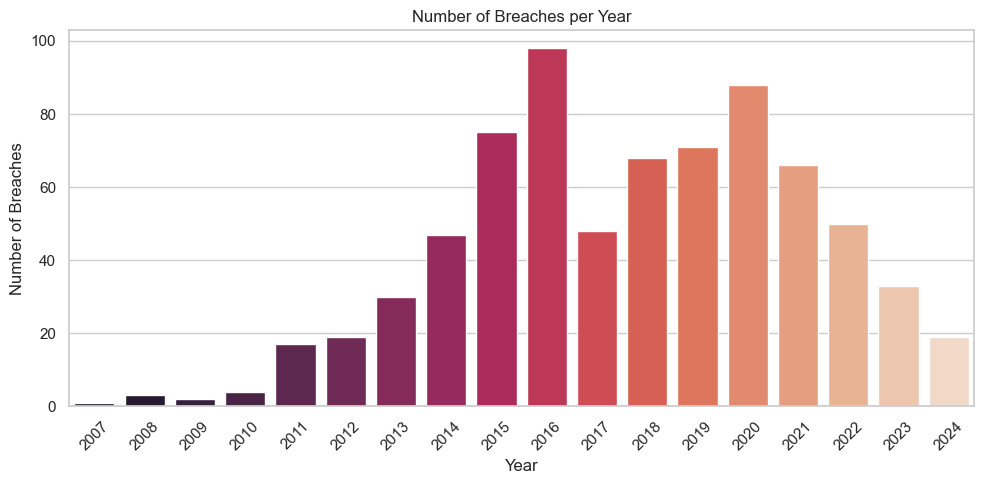

In [14]:
# Count of breaches per year
df['Year'] = df['BreachDate'].dt.year
breaches_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=breaches_per_year.index, y=breaches_per_year.values, palette='rocket')
plt.title('Number of Breaches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Observations:

- 2016 is the year with the most breaches, with around 100.
- The year with the lowest number of breaches was 2017
- The numer of breaches strat to grow from 2007 to 2016, maybe beacuse the numbers of users, online services and websites increased also during this time
- After 2016, the number of breaches starts to go down slowly, and after 2021 the drop becomes more clear
- This decrease could be related to better security practices, and the development of new cybersecurity tools and systems.



C:\Users\YAKO-ICT\AppData\Local\Temp\ipykernel_17636\1290771285.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PwnCount', y='Title', data=top_domains, palette='magma')


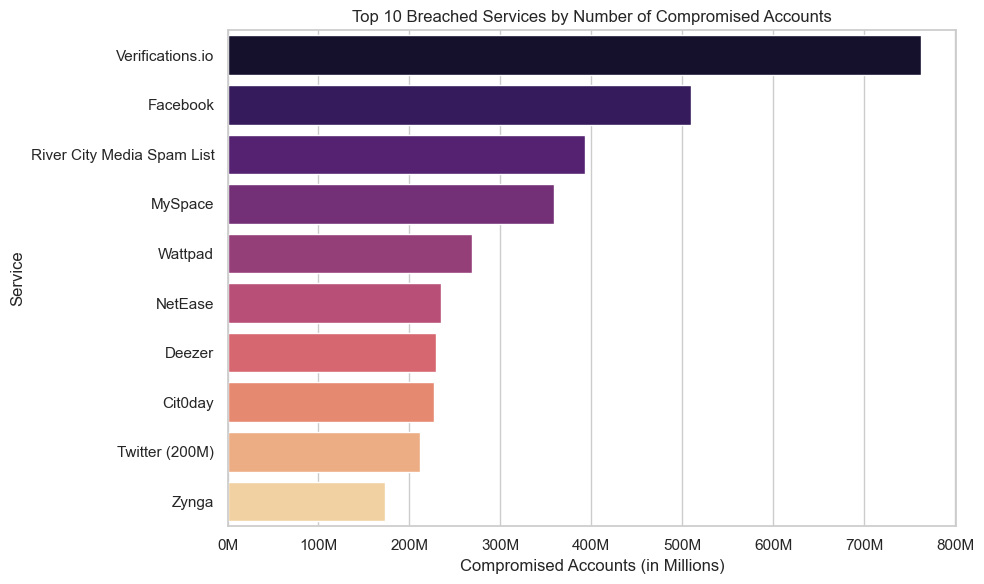

In [ ]:
# Top 10 most affected domains by number of compromised accounts
top_domains = df[['Title', 'PwnCount']].sort_values(by='PwnCount', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='PwnCount', y='Title', data=top_domains, palette='magma')
plt.title('Top 10 Breached Services by Number of Compromised Accounts')
plt.xlabel('Compromised Accounts (in Millions)')
plt.ylabel('Service')

# Mostrar valores en millones con 'M'
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))

plt.tight_layout()
plt.show()


### Observations: 

- The domain with the most breached accounts is **Verifications.io**, and the difference compared to the others is very noticeable.
- There are 3 social media platforms in the top 10: **Facebook, MySpace, and Twitter** — it's probably not a coincidence. Social media usually holds a lot of personal user data, which makes them a big target for breaches.


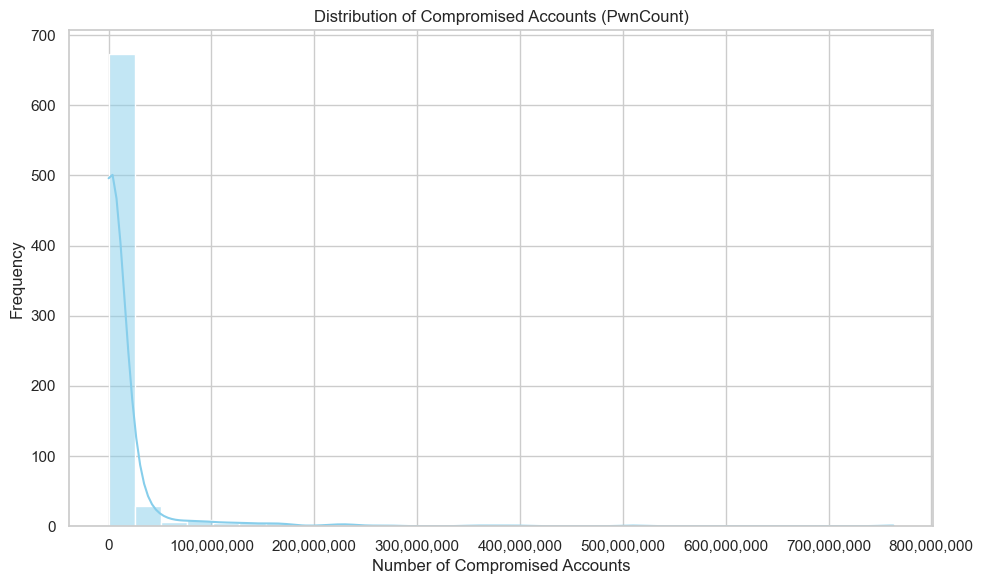

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PwnCount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Compromised Accounts (PwnCount)')
plt.xlabel('Number of Compromised Accounts')
plt.ylabel('Frequency')

# Formato con separador de miles
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


### Observations: 

- Most of the domains have between **0 and 35 million** compromised accounts in the incidents.
- After **50 million**, the values up to **800 million** are rare and probably belong to very popular domains like social media platforms — as we saw in the previous chart.


## 7.1 Hypothesis Test: Proportion of Sensitive vs. Non-Sensitive Breaches

In [ ]:
# Count of breaches with and without sensitive data
sensitive = df['IsSensitive'].sum()
non_sensitive = df.shape[0] - sensitive

# Two-proportion z-test
count = [sensitive, non_sensitive]
nobs = [df.shape[0], df.shape[0]]

stat, pval = proportions_ztest(count, nobs)
print(f"Z-Statistic: {stat:.2f}")
print(f"P-Value: {pval:.4f}")



Z-Statistic: -32.51
P-Value: 0.0000


### Result: Sensitive vs. Non-Sensitive Breaches

- A two-proportion z-test was performed to compare the number of breaches marked as sensitive (`IsSensitive = True`) versus non-sensitive.
- The test returned a **Z-statistic of -32.51** and a **P-value < 0.001**, meaning the difference is statistically significant.
- This suggests that most breaches in the dataset are **not sensitive**, and the difference is not due to random chance.


## 7.2 Conditional Probability: Malware Given Verified Breaches

In [ ]:
# Filter by verify breaches
verified = df[df['IsVerified'] == True]

# Count of verify breaches
total_verified = verified.shape[0]

# How many of verify breaches have IsMalware = True
malware_and_verified = verified[verified['IsMalware'] == True].shape[0]

# Probability conditional 
prob = malware_and_verified / total_verified

print(f"Total verified breaches: {total_verified}")
print(f"Verified breaches with malware: {malware_and_verified}")
print(f"Probability of malware given verified: {prob:.2%}")


Total verified breaches: 709
Verified breaches with malware: 0
Probability of malware given verified: 0.00%


### Result

- Out of 709 verified breaches none are associeted with malware
- This mean that if a breaches are verified the probability of is a malware it's 0%
- This could suggest that the breaches with malware are not typically breaches verified 


## 8. Export Cleaned Dataset for Power BI

In [26]:
# Convert all datetime columns to timezone-unaware
for col in ['BreachDate', 'AddedDate', 'ModifiedDate']:
    df[col] = df[col].dt.tz_localize(None)

# Export to Excel
output_path = '../data/cleaned_breaches.xlsx'
df.to_excel(output_path, index=False)

print(f"Dataset exported successfully to: {output_path}")


Dataset exported successfully to: ../data/cleaned_breaches.xlsx


## 9. Final Summary and Insights

- Most breaches happend between 2007 and 2016, with a big peak in 2016, After that, the number started to decrease maybe because of improvements in cybersecurity 
- The domain with most numbers of breached account was verification.io, with a difference compared with the other domains
- 3 Social medio plataforms appers in the top 10 of domains with most breached accounts, which make sense beacuse the numbers of users they have.
- A test showed that there are more breaches that are not sensitive than sensitive and that not due randomly
- The breaches verified are have 0% of probability to be mark as malware.
- Dataset was cleaned and export to excel file to be used for a dashboard in Power BI 